# Analisa Performa AtliQ.Co
## Computer Hardware & Peripheral Manufacturer

## Load Data
Data terdiri dari 3 file:
* Data penjualan: `transactions.csv`
* Data pelanggan: `customers.csv`
* Data produk: `products.csv`
* Data market: `markets.csv`
* Data tanggal: `date.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [3]:
plt.style.use('seaborn-v0_8-deep')

In [4]:
customer_path = "/content/drive/MyDrive/Datasets/atliq/customers.csv"
date_path = "/content/drive/MyDrive/Datasets/atliq/date.csv"
markets_path = "/content/drive/MyDrive/Datasets/atliq/markets.csv"
products_path = "/content/drive/MyDrive/Datasets/atliq/products.csv"
transactions_path = "/content/drive/MyDrive/Datasets/atliq/transactions.csv"

customer_data = pd.read_csv(customer_path)
date_data = pd.read_csv(date_path)
markets_data = pd.read_csv(markets_path)
products_data = pd.read_csv(products_path)
transactions_data = pd.read_csv(transactions_path)

In [5]:
customer_data.head(10)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar
5,Cus006,Electricalsara Stores,Brick & Mortar
6,Cus007,Info Stores,Brick & Mortar
7,Cus008,Acclaimed Stores,Brick & Mortar
8,Cus009,Electricalsquipo Stores,Brick & Mortar
9,Cus010,Atlas Stores,Brick & Mortar


In [6]:
markets_data.head(10)

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North
5,Mark006,Bengaluru,South
6,Mark007,Bhopal,Central
7,Mark008,Lucknow,North
8,Mark009,Patna,North
9,Mark010,Kochi,South


In [7]:
products_data.head(10)

,product_code,product_type
0,Prod001,Own Brand\r
1,Prod002,Own Brand\r
2,Prod003,Own Brand\r
3,Prod004,Own Brand\r
4,Prod005,Own Brand\r
5,Prod006,Own Brand\r
6,Prod007,Own Brand\r
7,Prod008,Own Brand\r
8,Prod009,Own Brand\r
9,Prod010,Own Brand\r


In [8]:
date_data.head(10)

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun\r
1,2017-06-02,2017-06-01,2017,June,17-Jun\r
2,2017-06-03,2017-06-01,2017,June,17-Jun\r
3,2017-06-04,2017-06-01,2017,June,17-Jun\r
4,2017-06-05,2017-06-01,2017,June,17-Jun\r
5,2017-06-06,2017-06-01,2017,June,17-Jun\r
6,2017-06-07,2017-06-01,2017,June,17-Jun\r
7,2017-06-08,2017-06-01,2017,June,17-Jun\r
8,2017-06-09,2017-06-01,2017,June,17-Jun\r
9,2017-06-10,2017-06-01,2017,June,17-Jun\r


In [9]:
transactions_data.head(10)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70
5,Prod279,Cus020,Mark011,2018-03-20,1,102,INR,0.26,26.52,75.48
6,Prod279,Cus020,Mark011,2018-03-22,1,102,INR,-0.35,-35.70,137.70
7,Prod279,Cus020,Mark011,2018-03-23,1,102,INR,-0.35,-35.70,137.70
8,Prod279,Cus020,Mark011,2018-03-29,1,102,INR,0.34,34.68,67.32
9,Prod279,Cus020,Mark011,2018-04-16,1,102,INR,-0.06,-6.12,108.12


In [10]:
customer_copy = customer_data.copy()
date_copy = date_data.copy()
markets_copy = markets_data.copy()
products_copy = products_data.copy()
transactions_copy = transactions_data.copy()

In [11]:
customer_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  38 non-null     object
 1   custmer_name   38 non-null     object
 2   customer_type  38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [12]:
markets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   markets_code  17 non-null     object
 1   markets_name  17 non-null     object
 2   zone          15 non-null     object
dtypes: object(3)
memory usage: 540.0+ bytes


In [13]:
products_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  279 non-null    object
 1   product_type  279 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [14]:
transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148395 entries, 0 to 148394
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_code              148395 non-null  object 
 1   customer_code             148395 non-null  object 
 2   market_code               148395 non-null  object 
 3   order_date                148395 non-null  object 
 4   sales_qty                 148395 non-null  int64  
 5   sales_amount              148395 non-null  int64  
 6   currency                  148395 non-null  object 
 7   profit_margin_percentage  148395 non-null  float64
 8   profit_margin             148395 non-null  float64
 9   cost_price                148395 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 11.3+ MB


In [15]:
transactions_copy["order_date"] = pd.to_datetime(transactions_copy["order_date"])
transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148395 entries, 0 to 148394
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   product_code              148395 non-null  object        
 1   customer_code             148395 non-null  object        
 2   market_code               148395 non-null  object        
 3   order_date                148395 non-null  datetime64[ns]
 4   sales_qty                 148395 non-null  int64         
 5   sales_amount              148395 non-null  int64         
 6   currency                  148395 non-null  object        
 7   profit_margin_percentage  148395 non-null  float64       
 8   profit_margin             148395 non-null  float64       
 9   cost_price                148395 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 11.3+ MB


In [16]:
date_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1126 non-null   object
 1   cy_date      1126 non-null   object
 2   year         1126 non-null   int64 
 3   month_name   1126 non-null   object
 4   date_yy_mmm  1126 non-null   object
dtypes: int64(1), object(4)
memory usage: 44.1+ KB


In [17]:
date_copy["date"] = pd.to_datetime(date_copy["date"])
date_copy["cy_date"] = pd.to_datetime(date_copy["cy_date"])

date_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1126 non-null   datetime64[ns]
 1   cy_date      1126 non-null   datetime64[ns]
 2   year         1126 non-null   int64         
 3   month_name   1126 non-null   object        
 4   date_yy_mmm  1126 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 44.1+ KB


In [18]:
transactions_copy['order_date'].agg(["min", "max"])

,order_date
min,2017-10-04
max,2020-06-26


In [19]:
date_copy["date"].agg(["min", "max"])

,date
min,2017-06-01
max,2020-06-30


## Pertumbuhan perbulan

In [20]:
rangkuman_bulan = transactions_copy.groupby(transactions_copy["order_date"].dt.to_period("M").rename("revenue_per_bulan")).agg(
    total_revenue = ("sales_amount", "sum"),
    total_profit = ("profit_margin", "sum"),
    avg_revenue = ("sales_amount", "mean"),
    avg_profit = ("profit_margin", "mean"),
    total_unit = ("sales_qty", "sum")
)

rangkuman_bulan

,total_revenue,total_profit,avg_revenue,avg_profit,total_unit
revenue_per_bulan,,,,,
2017-10,26087017,683264.02,6178.829228,161.834207,66595
2017-11,34998960,674042.36,6456.181516,124.339118,88448
2017-12,31796676,1415761.65,6470.630037,288.107784,79419
2018-01,42520492,514632.05,8117.696067,98.249723,87873
2018-02,35243966,1526401.69,7147.427702,309.552158,87583
2018-03,38153155,1091891.29,7394.022287,211.606839,90337
2018-04,35891903,303916.56,7080.667390,59.955920,91644
2018-05,32188350,423263.57,6188.877139,81.381190,92525
2018-06,34744297,194218.42,6356.439261,35.532093,86868


In [21]:
# hitung tingkat pertumbuhan setiap metrik
rangkuman_bulan["pertumbuhan_revenue"] = rangkuman_bulan["total_revenue"].pct_change() * 100
rangkuman_bulan["pertumbuhan_profit"] = rangkuman_bulan["total_profit"].pct_change() * 100
rangkuman_bulan["pertumbuhan_aov_revenue"] = rangkuman_bulan["avg_revenue"].pct_change() * 100
rangkuman_bulan["pertumbuhan_aov_profit"] = rangkuman_bulan["avg_profit"].pct_change() * 100
rangkuman_bulan["pertumbuhan_pemesanan"] = rangkuman_bulan["total_unit"].pct_change() * 100

rangkuman_bulan = rangkuman_bulan.fillna(0).round(0).astype(int)

# visualisasikan menggunakan gradasi warna berdasarkan data
rangkuman_gaya = rangkuman_bulan.style.format("{:,}") # gunakan format koma
rangkuman_gaya = rangkuman_gaya.background_gradient(
    subset=["pertumbuhan_revenue", "pertumbuhan_profit", "pertumbuhan_aov_revenue","pertumbuhan_aov_profit", "pertumbuhan_pemesanan"],
    cmap="RdYlGn", # format merah, kuning, hijau
    vmin=-100,
    vmax=100
)

rangkuman_gaya

,total_revenue,total_profit,avg_revenue,avg_profit,total_unit,pertumbuhan_revenue,pertumbuhan_profit,pertumbuhan_aov_revenue,pertumbuhan_aov_profit,pertumbuhan_pemesanan
revenue_per_bulan,,,,,,,,,,
2017-10,"26,087,017","683,264","6,179",162,"66,595",0,0,0,0,0
2017-11,"34,998,960","674,042","6,456",124,"88,448",34,-1,4,-23,33
2017-12,"31,796,676","1,415,762","6,471",288,"79,419",-9,110,0,132,-10
2018-01,"42,520,492","514,632","8,118",98,"87,873",34,-64,25,-66,11
2018-02,"35,243,966","1,526,402","7,147",310,"87,583",-17,197,-12,215,0
2018-03,"38,153,155","1,091,891","7,394",212,"90,337",8,-28,3,-32,3
2018-04,"35,891,903","303,917","7,081",60,"91,644",-6,-72,-4,-72,1
2018-05,"32,188,350","423,264","6,189",81,"92,525",-10,39,-13,36,1
2018-06,"34,744,297","194,218","6,356",36,"86,868",8,-54,3,-56,-6


## Pertumbuhan Pertahun

In [22]:
rangkuman_tahun = transactions_copy.groupby(transactions_copy["order_date"].dt.to_period("Y").rename("pembelian_per_tahun")).agg(
    total_revenue = ("sales_amount", "sum"),
    total_profit = ("profit_margin", "sum"),
    avg_revenue = ("sales_amount", "mean"),
    avg_profit = ("profit_margin", "mean"),
    total_unit = ("sales_qty", "sum")
)

# tingkat pertumbuhan
rangkuman_tahun["pertumbuhan_revenue"] = rangkuman_tahun["total_revenue"].pct_change() * 100
rangkuman_tahun["pertumbuhan_profit"] = rangkuman_tahun["total_profit"].pct_change() * 100
rangkuman_tahun["pertumbuhan_aov_revenue"] = rangkuman_tahun["avg_revenue"].pct_change() * 100
rangkuman_tahun["pertumbuhan_aov_profit"] = rangkuman_tahun["avg_profit"].pct_change() * 100
rangkuman_tahun["pertumbuhan_pemesanan"] = rangkuman_tahun["total_unit"].pct_change() * 100

rangkuman_tahun = rangkuman_tahun.fillna(0).round(0).astype(int)

rangkuman_gaya = rangkuman_tahun.style.format("{:,}") # gunakan format koma
rangkuman_gaya = rangkuman_gaya.background_gradient(
    subset=["pertumbuhan_revenue", "pertumbuhan_profit", "pertumbuhan_aov_revenue","pertumbuhan_aov_profit", "pertumbuhan_pemesanan"],
    cmap="RdYlGn", # format merah, kuning, hijau
    vmin=-100,
    vmax=100
)

rangkuman_gaya

,total_revenue,total_profit,avg_revenue,avg_profit,total_unit,pertumbuhan_revenue,pertumbuhan_profit,pertumbuhan_aov_revenue,pertumbuhan_aov_profit,pertumbuhan_pemesanan
pembelian_per_tahun,,,,,,,,,,
2017,"92,882,653","2,773,068","6,381",190,"234,462",0,0,0,0,0
2018,"413,687,163","9,337,296","6,809",154,"997,497",345,237,7,-19,325
2019,"336,019,102","10,486,544","6,498",203,"847,083",-19,12,-5,32,-15
2020,"142,224,545","2,060,160","6,655",96,"350,240",-58,-80,2,-52,-59


In [23]:
rangkuman_kualtal = transactions_copy.groupby(transactions_copy["order_date"].dt.to_period("Q").rename("pembelian_per_kualtal")).agg(
    total_revenue = ("sales_amount", "sum"),
    total_profit = ("profit_margin", "sum"),
    avg_revenue = ("sales_amount", "mean"),
    avg_profit = ("profit_margin", "mean"),
    total_unit = ("sales_qty", "sum")
)

# tingkat pertumbuhan
rangkuman_kualtal["pertumbuhan_revenue"] = rangkuman_kualtal["total_revenue"].pct_change() * 100
rangkuman_kualtal["pertumbuhan_profit"] = rangkuman_kualtal["total_profit"].pct_change() * 100
rangkuman_kualtal["pertumbuhan_aov_revenue"] = rangkuman_kualtal["avg_revenue"].pct_change() * 100
rangkuman_kualtal["pertumbuhan_aov_profit"] = rangkuman_kualtal["avg_profit"].pct_change() * 100
rangkuman_kualtal["pertumbuhan_pemesanan"] = rangkuman_kualtal["total_unit"].pct_change() * 100

rangkuman_kualtal = rangkuman_kualtal.fillna(0).round(0).astype(int)

rangkuman_gaya = rangkuman_kualtal.style.format("{:,}") # gunakan format koma
rangkuman_gaya = rangkuman_gaya.background_gradient(
    subset=["pertumbuhan_revenue", "pertumbuhan_profit", "pertumbuhan_aov_revenue","pertumbuhan_aov_profit", "pertumbuhan_pemesanan"],
    cmap="RdYlGn", # format merah, kuning, hijau
    vmin=-100,
    vmax=100
)

rangkuman_gaya

,total_revenue,total_profit,avg_revenue,avg_profit,total_unit,pertumbuhan_revenue,pertumbuhan_profit,pertumbuhan_aov_revenue,pertumbuhan_aov_profit,pertumbuhan_pemesanan
pembelian_per_kualtal,,,,,,,,,,
2017Q4,"92,882,653","2,773,068","6,381",190,"234,462",0,0,0,0,0
2018Q1,"115,917,613","3,132,925","7,562",204,"265,793",25,13,19,7,13
2018Q2,"102,824,550","921,399","6,534",59,"271,037",-11,-71,-14,-71,2
2018Q3,"105,531,222","2,437,244","6,821",158,"246,481",3,165,4,169,-9
2018Q4,"89,413,778","2,845,728","6,289",200,"214,186",-15,17,-8,27,-13
2019Q1,"86,932,142","3,679,459","6,298",267,"203,795",-3,29,0,33,-5
2019Q2,"81,027,451","2,316,093","6,042",173,"195,263",-7,-37,-4,-35,-4
2019Q3,"92,181,694","2,426,075","7,083",186,"248,187",14,5,17,8,27
2019Q4,"75,877,815","2,064,917","6,607",180,"199,838",-18,-15,-7,-4,-19


## Perbulan berdasarkan tahun

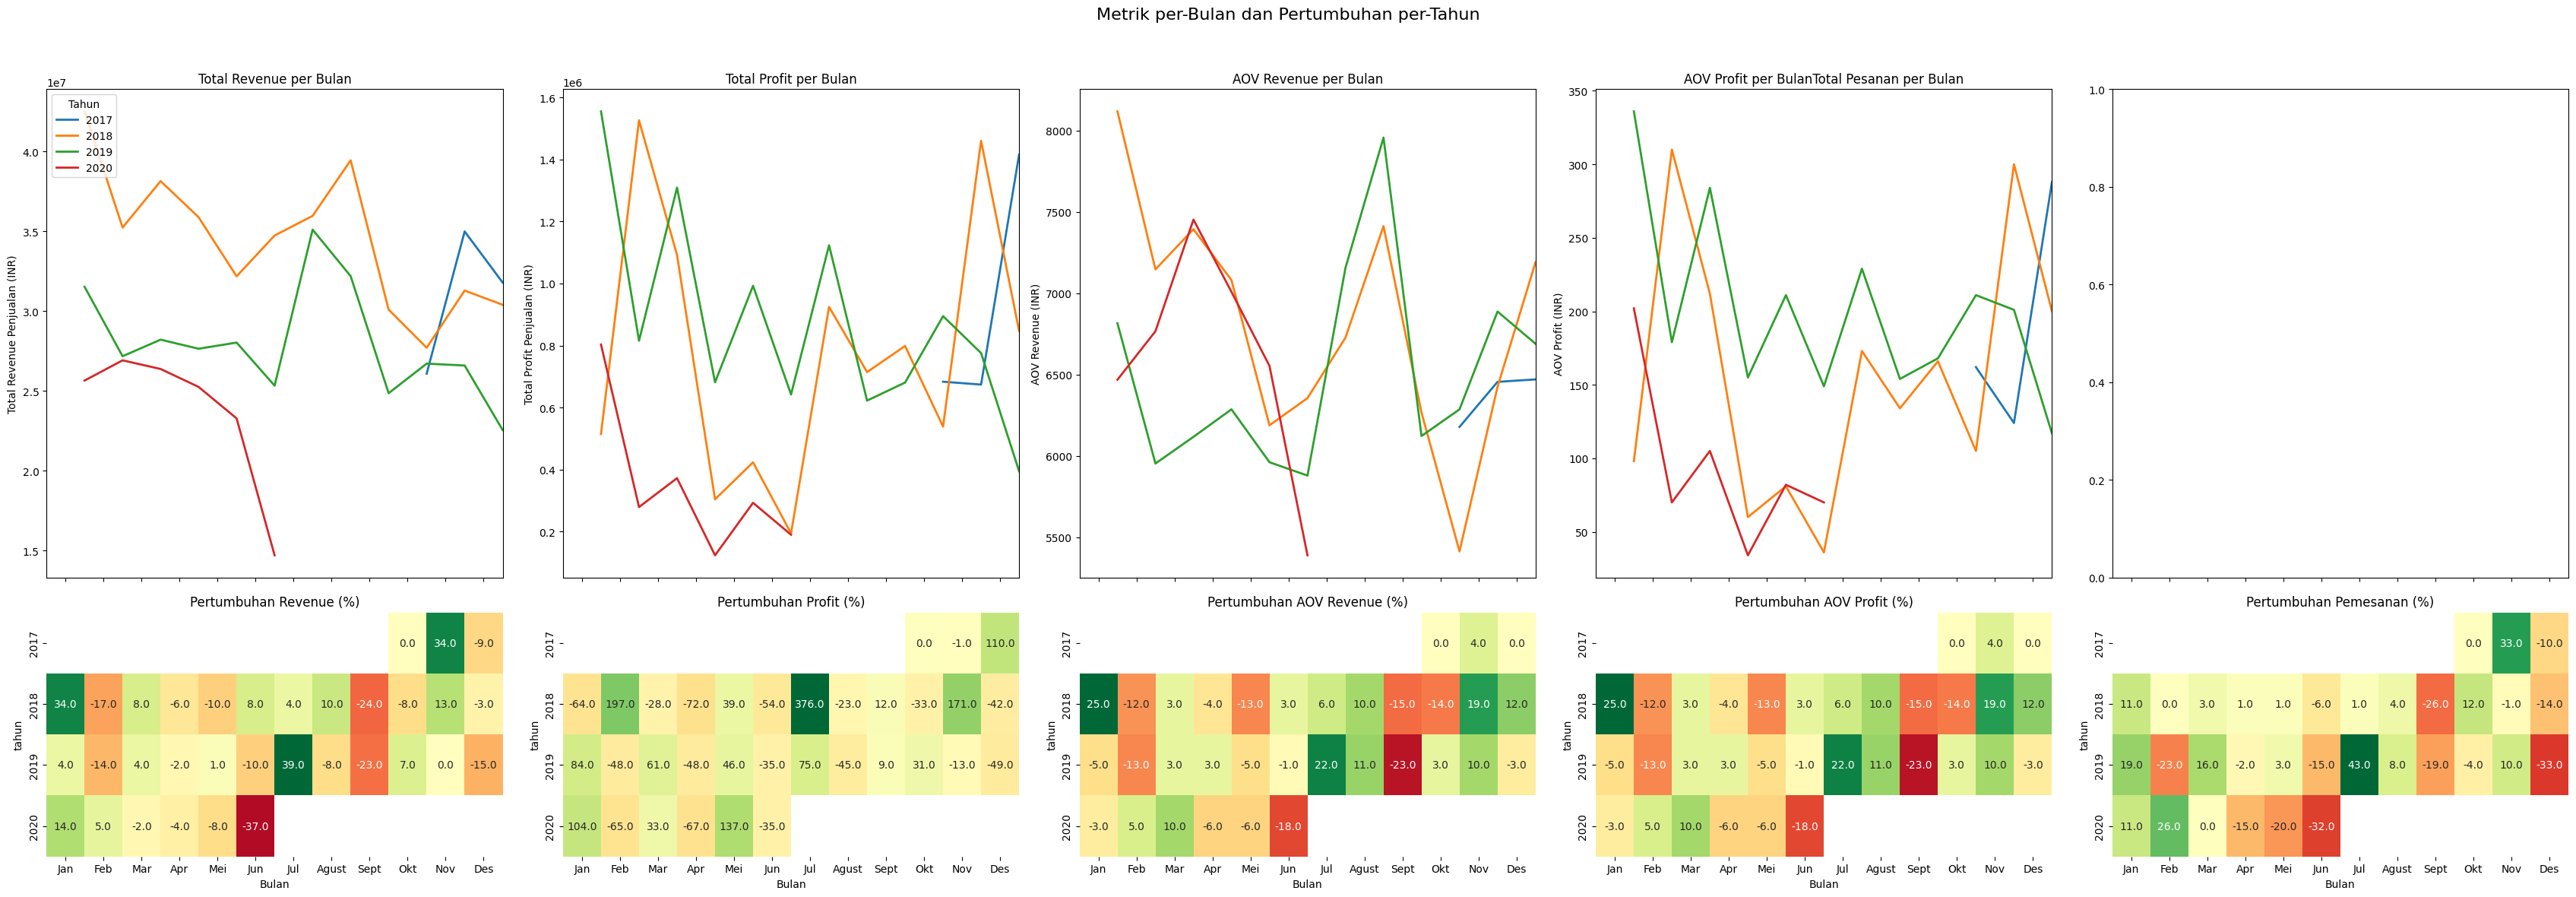

In [24]:
# Pisahkan antara bulan dan tahun
rangkuman_bulan['tahun'] = rangkuman_bulan.index.year
rangkuman_bulan['bulan'] = rangkuman_bulan.index.month

# visual dengan 2x3 kotak: 3 garis chart dan heatmap
fig, axes =  plt.subplots(2,5, figsize=(34, 12), sharex='col', gridspec_kw={'height_ratios':[2,1]})

# warna untuk tiap tahun
tahunan = rangkuman_bulan['tahun'].unique()
warna = plt.cm.tab10(np.arange(len(tahunan)))

# metrik
metrik = ["total_revenue", "total_profit", "avg_revenue", "avg_profit", "total_unit"]
judul = ["Total Revenue per Bulan", "Total Profit per Bulan", "AOV Revenue per Bulan", "AOV Profit per Bulan" 'Total Pesanan per Bulan']
y_labels = ["Total Revenue Penjualan (INR)", "Total Profit Penjualan (INR)", "AOV Revenue (INR)", "AOV Profit (INR)", "Total Pesanan "]
metriks_pertumbuhan = ["pertumbuhan_revenue", "pertumbuhan_profit" ,"pertumbuhan_aov_revenue", "pertumbuhan_aov_revenue", "pertumbuhan_pemesanan"]
judul_pertumbuhan = ["Pertumbuhan Revenue (%)", "Pertumbuhan Profit (%)", "Pertumbuhan AOV Revenue (%)", "Pertumbuhan AOV Profit (%)", "Pertumbuhan Pemesanan (%)"]

# plot line charts
for i, (metric, title, y_label) in enumerate(zip(metrik, judul, y_labels)):
  for j, tahun in enumerate(tahunan):
    data_tahunan = rangkuman_bulan[rangkuman_bulan["tahun"] == tahun]
    axes[0, i].plot(data_tahunan['bulan'], data_tahunan[metric], label=f"{tahun}", color=warna[j], linewidth=2)
  axes[0, i].set_title(title)
  axes[0, i].set_ylabel(y_label)
  axes[0, i].set_xticks(range(1,13))
  axes[0, i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sept", "Okt", "Nov", "Des"])
  if i == 0:
    axes[0, i].legend(title="Tahun", loc="upper left")

# Plot heatmap
for i, (metrik_pertumbuhan, judul_metrik) in enumerate(zip(metriks_pertumbuhan, judul_pertumbuhan)):
  data_pertumbuhan = rangkuman_bulan.pivot_table(index="tahun", columns='bulan', values=metrik_pertumbuhan)
  sns.heatmap(data_pertumbuhan, cmap="RdYlGn", ax=axes[1,i], cbar=False, annot=True, fmt=".1f", center=0)
  axes[1, i].set_title(judul_metrik)
  axes[1, i].set_xticks(np.arange(0.5,12))
  axes[1, i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agust", "Sept", "Okt", "Nov", "Des"])
  axes[1, i].set_xlabel("Bulan")

# pengaturan terakhir
plt.suptitle("Metrik per-Bulan dan Pertumbuhan per-Tahun", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Pertumbuhan berdasarkan Market

In [25]:
markets_copy.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [26]:
market_transaction = pd.merge(transactions_copy, markets_copy, left_on="market_code", right_on="markets_code", how="inner")

In [27]:
market_transaction.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,markets_code,markets_name,zone
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Mark011,Nagpur,Central
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Mark011,Nagpur,Central
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Mark011,Nagpur,Central
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Mark011,Nagpur,Central
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Mark011,Nagpur,Central


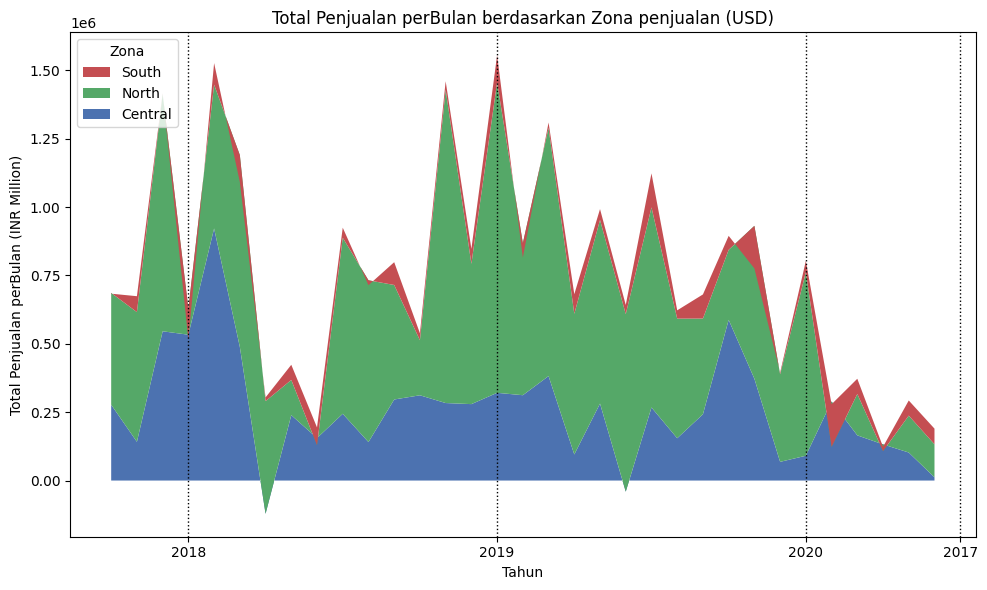

In [28]:
# Kelompokkan berdasarkan negara dan bulan untuk menghitung total penjualan per-bulan
penjualan_bulan = market_transaction.groupby([market_transaction["order_date"].dt.to_period("M"), "zone"])["profit_margin"].sum().unstack(fill_value=0)

# normalisasi untuk mendapatkan persentase kontribusi untuk setiap negara
persentase_penjualan_bulan = penjualan_bulan.div(penjualan_bulan.sum(axis=1), axis=0) * 100

# buat function untuk plot area dengan tanda tahun
def plot_stacked_area(data, judul, ylabel):
  plt.figure(figsize=(10, 6))
  plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

  # tambahkan garis vertikal pada awal setiap tahun
  tahunan = sorted(data.index.year.unique())
  for tahun in tahunan:
    plt.axvline(x=f"{tahun}-01", color='black', linestyle=":", linewidth=1)

  # balikkan legend
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="upper left", title="Zona")

  # judul dan label
  plt.title(judul)
  plt.xlabel("Tahun")
  plt.ylabel(ylabel)

  # perlihatkan hanya tahun pada x-axis label
  plt.xticks([f"{tahun}-01" for tahun in tahunan], [str(tahun) for tahun in tahunan])

  plt.tight_layout()
  plt.show()

# plot total penjualan
plot_stacked_area(
    penjualan_bulan,
    judul="Total Penjualan perBulan berdasarkan Zona penjualan (USD)",
    ylabel="Total Penjualan perBulan (INR Million)"
)

In [29]:
market_transaction.zone.unique()

array(['Central', 'North', 'South'], dtype=object)

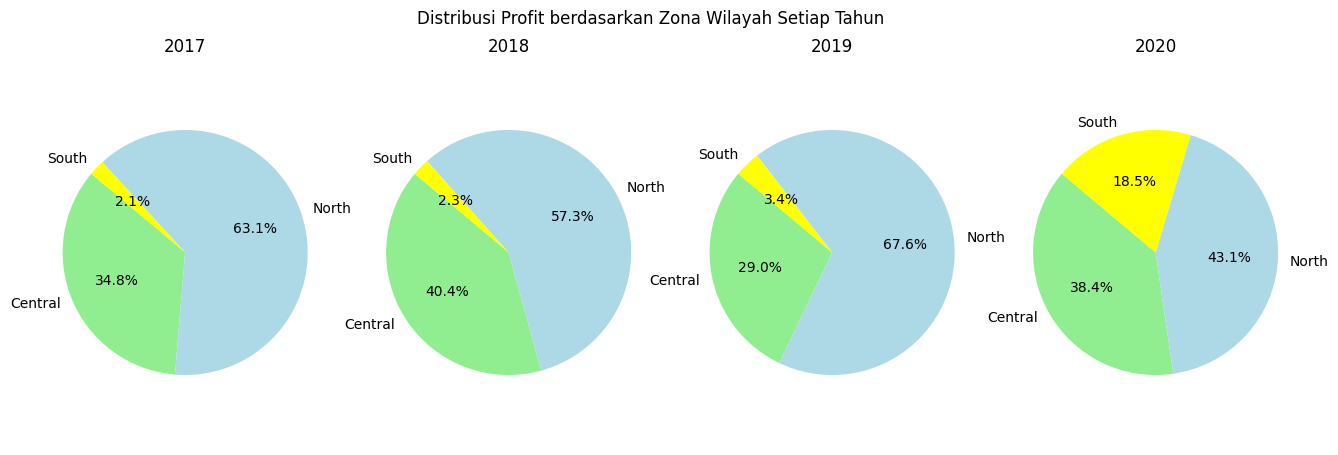

In [30]:
zona_pie = market_transaction.groupby([market_transaction["order_date"].dt.year.rename("tahun"), "zone"])["profit_margin"].sum().unstack()

# pelanggan_pie = pelanggan_pie.fillna(0).astype(int) -> jika ingin menyertakan 2014
pelanggan_pie = zona_pie.dropna()

label = ['Central', 'North', 'South']
# set garis untuk subplot
num_tahun = pelanggan_pie.shape[0]
fig, axes = plt.subplots(1, num_tahun, figsize=(4*num_tahun, 5))

# Warna untuk setiap kelas pelanggan
warna=["lightgreen", "lightblue", "yellow"]

# loop untuk setiap tahun dan setiap kelas pelanggan
for i, (tahun, data) in enumerate(pelanggan_pie.iterrows()):
  ax=axes[i] if num_tahun > 1 else axes
  ax.pie(data, labels=label, autopct="%1.1f%%",startangle=140, colors=warna)
  ax.set_title(int(tahun))
  ax.axis("equal")

# judul keseluruhan
fig.suptitle("Distribusi Profit berdasarkan Zona Wilayah Setiap Tahun")

# layout
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

## Normalisasi data dengan menghilangkan Delhi NCR
Customer Electricalsara Stores terdapat di Delhi NCR, kemungkinan akan mempengaruhi analisa terkait wilayah secara keseluruhan

In [31]:
markets_normal_distribution = markets_copy[~markets_copy['markets_name'].str.contains("Delhi NCR")]

market_transaction_normal = pd.merge(transactions_copy, markets_normal_distribution, left_on="market_code", right_on="markets_code", how="inner")

markets_normal_distribution.markets_name.unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Kanpur', 'Bengaluru', 'Bhopal',
       'Lucknow', 'Patna', 'Kochi', 'Nagpur', 'Surat', 'Hyderabad',
       'Bhubaneshwar', 'New York', 'Paris'], dtype=object)

In [32]:
market_transaction_normal.markets_name.unique()

array(['Nagpur', 'Ahmedabad', 'Bhopal', 'Mumbai', 'Kanpur', 'Hyderabad',
       'Patna', 'Surat', 'Bhubaneshwar', 'Kochi', 'Chennai', 'Bengaluru',
       'Lucknow'], dtype=object)

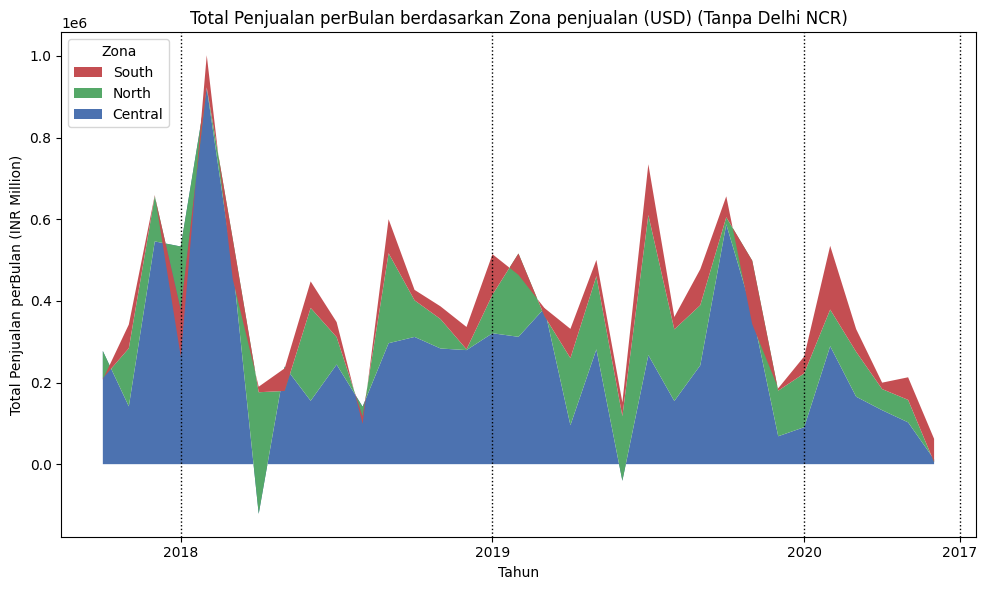

In [33]:
# Kelompokkan berdasarkan negara dan bulan untuk menghitung total penjualan per-bulan
penjualan_bulan = market_transaction_normal.groupby([market_transaction_normal["order_date"].dt.to_period("M"), "zone"])["profit_margin"].sum().unstack(fill_value=0)

# normalisasi untuk mendapatkan persentase kontribusi untuk setiap negara
persentase_penjualan_bulan = penjualan_bulan.div(penjualan_bulan.sum(axis=1), axis=0) * 100

# buat function untuk plot area dengan tanda tahun
def plot_stacked_area(data, judul, ylabel):
  plt.figure(figsize=(10, 6))
  plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

  # tambahkan garis vertikal pada awal setiap tahun
  tahunan = sorted(data.index.year.unique())
  for tahun in tahunan:
    plt.axvline(x=f"{tahun}-01", color='black', linestyle=":", linewidth=1)

  # balikkan legend
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="upper left", title="Zona")

  # judul dan label
  plt.title(judul)
  plt.xlabel("Tahun")
  plt.ylabel(ylabel)

  # perlihatkan hanya tahun pada x-axis label
  plt.xticks([f"{tahun}-01" for tahun in tahunan], [str(tahun) for tahun in tahunan])

  plt.tight_layout()
  plt.show()

# plot total penjualan
plot_stacked_area(
    penjualan_bulan,
    judul="Total Penjualan perBulan berdasarkan Zona penjualan (USD) (Tanpa Delhi NCR)",
    ylabel="Total Penjualan perBulan (INR Million)"
)

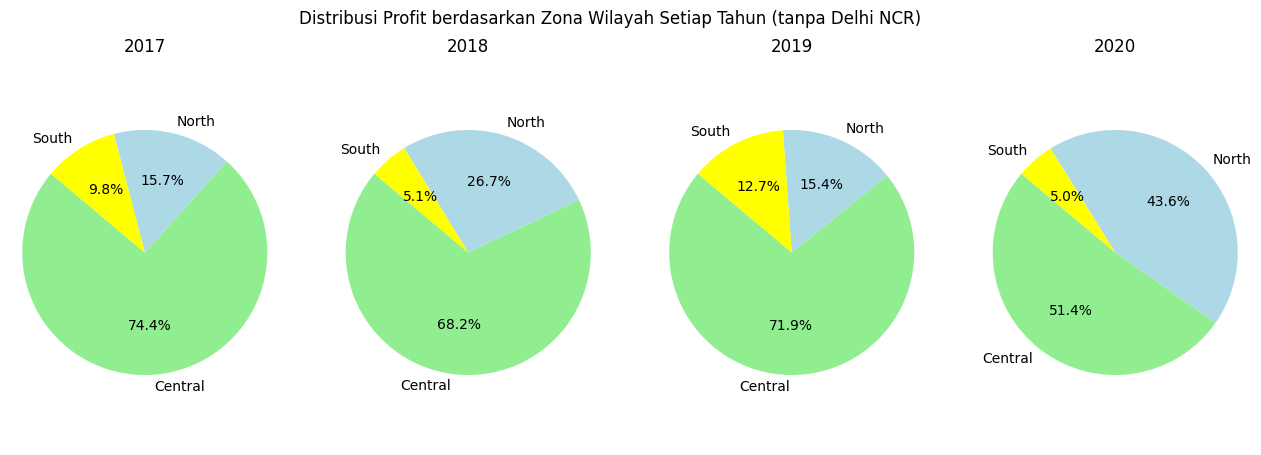

In [34]:
zona_pie = market_transaction_normal.groupby([market_transaction["order_date"].dt.year.rename("tahun"), "zone"])["profit_margin"].sum().unstack()

# pelanggan_pie = pelanggan_pie.fillna(0).astype(int) -> jika ingin menyertakan 2014
pelanggan_pie = zona_pie.dropna()

label = ['Central', 'North', 'South']
# set garis untuk subplot
num_tahun = pelanggan_pie.shape[0]
fig, axes = plt.subplots(1, num_tahun, figsize=(4*num_tahun, 5))

# Warna untuk setiap kelas pelanggan
warna=["lightgreen", "lightblue", "yellow"]

# loop untuk setiap tahun dan setiap kelas pelanggan
for i, (tahun, data) in enumerate(pelanggan_pie.iterrows()):
  ax=axes[i] if num_tahun > 1 else axes
  ax.pie(data, labels=label, autopct="%1.1f%%",startangle=140, colors=warna)
  ax.set_title(int(tahun))
  ax.axis("equal")

# judul keseluruhan
fig.suptitle("Distribusi Profit berdasarkan Zona Wilayah Setiap Tahun (tanpa Delhi NCR)")

# layout
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [35]:
market_transaction.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'markets_code', 'markets_name', 'zone'],
      dtype='object')

In [36]:
performa_zona = market_transaction.groupby("zone").agg(
    total_profit=('profit_margin', 'sum'),
    total_profit_pct=('profit_margin', lambda x: x.sum() / market_transaction['profit_margin'].sum() * 100),
    aov=('profit_margin', 'mean'),
    total_pemesanan=('sales_qty', 'count'),
    total_pemesanan_pct=('sales_qty', lambda x: x.count() / market_transaction['sales_qty'].sum() * 100),
)

# urutkan berdasarkan total pemasukan dari yang tertinggi
performa_zona = performa_zona.sort_values(by='total_profit', ascending=False)

# Round values to two decimal places
performa_zona = performa_zona.round(2)

# Apply background gradients and comma formatting
performa_zona_gaya = performa_zona.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_profit_pct', 'total_pemesanan_pct'],
    cmap="Greens",  # White to Green gradient
    vmin=0
)

# Display the styled DataFrame
performa_zona_gaya

,total_profit,total_profit_pct,aov,total_pemesanan,total_pemesanan_pct
zone,,,,,
North,"15,076,287.62",61.14,221.79,"67,974.00",2.80
Central,"8,571,899.18",34.76,118.54,"72,313.00",2.98
South,"1,008,881.61",4.09,124.43,"8,108.00",0.33


## Pertumbuhan berdasarkan Customer/Pelanggan

In [37]:
customer_transaction = pd.merge(transactions_copy, customer_copy, left_on="customer_code", right_on="customer_code", how="inner")

In [38]:
customer_transaction.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'custmer_name', 'customer_type'],
      dtype='object')

In [39]:
customer_transaction.customer_type.unique()

array(['E-Commerce', 'Brick & Mortar'], dtype=object)

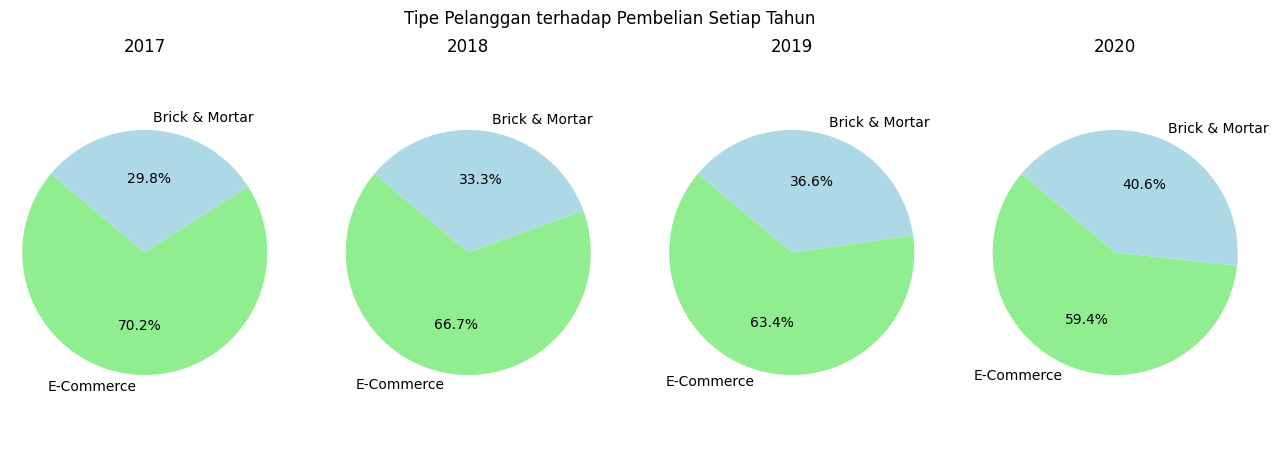

In [40]:
pelanggan_pie = customer_transaction.groupby([customer_transaction["order_date"].dt.year.rename("tahun"), "customer_type"])["profit_margin"].count().unstack()

# pelanggan_pie = pelanggan_pie.fillna(0).astype(int) -> jika ingin menyertakan 2014
pelanggan_pie = pelanggan_pie.dropna()

label = ['E-Commerce', 'Brick & Mortar']
# set garis untuk subplot
num_tahun = pelanggan_pie.shape[0]
fig, axes = plt.subplots(1, num_tahun, figsize=(4*num_tahun, 5))

# Warna untuk setiap kelas pelanggan
warna=["lightgreen", "lightblue"]

# loop untuk setiap tahun dan setiap kelas pelanggan
for i, (tahun, data) in enumerate(pelanggan_pie.iterrows()):
  ax=axes[i] if num_tahun > 1 else axes
  ax.pie(data, labels=label, autopct="%1.1f%%",startangle=140, colors=warna)
  ax.set_title(int(tahun))
  ax.axis("equal")

# judul keseluruhan
fig.suptitle("Tipe Pelanggan terhadap Pembelian Setiap Tahun")

# layout
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [41]:
product_transaction = pd.merge(transactions_copy, products_copy, left_on="product_code", right_on="product_code", how="inner")

In [42]:
product_transaction.product_type.unique()

array(['Distribution\r', 'Own Brand\r'], dtype=object)

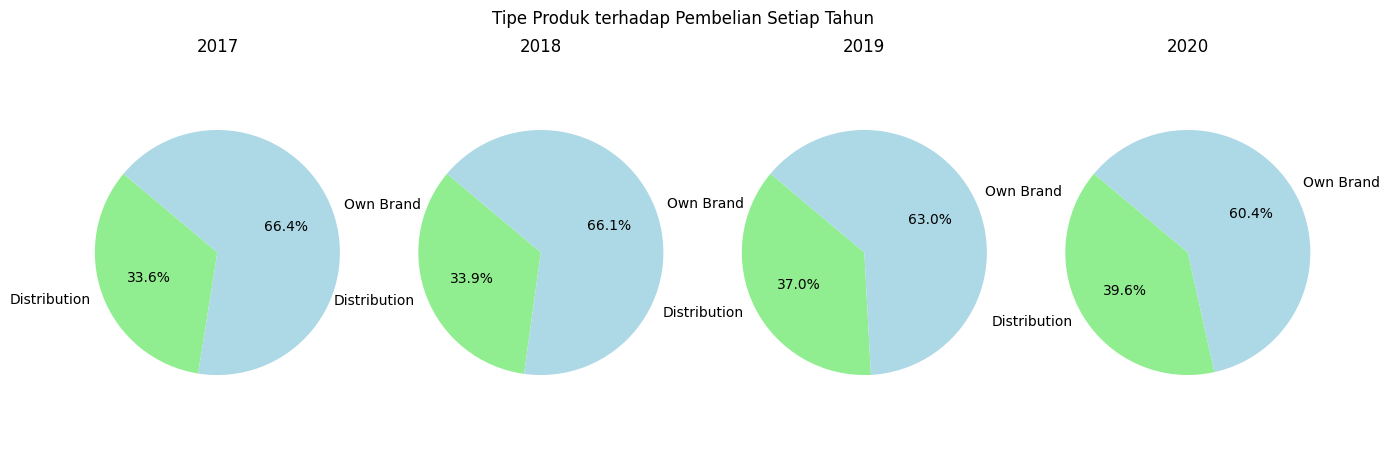

In [43]:
tipe_produk_pie = product_transaction.groupby([product_transaction["order_date"].dt.year.rename("tahun"), "product_type"])["profit_margin"].count().unstack()

# pelanggan_pie = pelanggan_pie.fillna(0).astype(int) -> jika ingin menyertakan 2014
tipe_produk_pie = tipe_produk_pie.dropna()

label = ['Distribution', 'Own Brand']
# set garis untuk subplot
num_tahun = tipe_produk_pie.shape[0]
fig, axes = plt.subplots(1, num_tahun, figsize=(4*num_tahun, 5))

# Warna untuk setiap kelas pelanggan
warna=["lightgreen", "lightblue"]

# loop untuk setiap tahun dan setiap kelas pelanggan
for i, (tahun, data) in enumerate(tipe_produk_pie.iterrows()):
  ax=axes[i] if num_tahun > 1 else axes
  ax.pie(data, labels=label, autopct="%1.1f%%",startangle=140, colors=warna)
  ax.set_title(int(tahun))
  ax.axis("equal")

# judul keseluruhan
fig.suptitle("Tipe Produk terhadap Pembelian Setiap Tahun")

# layout
#plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [44]:
customer_copy.custmer_name.unique()

array(['Surge Stores', 'Nomad Stores', 'Excel Stores', 'Surface Stores',
       'Premium Stores', 'Electricalsara Stores', 'Info Stores',
       'Acclaimed Stores', 'Electricalsquipo Stores', 'Atlas Stores',
       'Flawless Stores', 'Integration Stores', 'Unity Stores',
       'Forward Stores', 'Electricalsbea Stores', 'Logic Stores',
       'Epic Stores', 'Electricalslance Stores',
       'Electricalsopedia Stores', 'Nixon', 'Modular',
       'Electricalslytical', 'Sound', 'Power', 'Path', 'Insight',
       'Control', 'Sage', 'Electricalsocity', 'Synthetic', 'Zone',
       'Elite', 'All-Out', 'Expression', 'Relief', 'Novus', 'Propel',
       'Leader'], dtype=object)

In [45]:
customer_normal_distribution = customer_copy[~customer_copy["custmer_name"].str.contains("Electricalsara Stores")]

In [46]:
customer_normal_distribution.custmer_name.unique()

array(['Surge Stores', 'Nomad Stores', 'Excel Stores', 'Surface Stores',
       'Premium Stores', 'Info Stores', 'Acclaimed Stores',
       'Electricalsquipo Stores', 'Atlas Stores', 'Flawless Stores',
       'Integration Stores', 'Unity Stores', 'Forward Stores',
       'Electricalsbea Stores', 'Logic Stores', 'Epic Stores',
       'Electricalslance Stores', 'Electricalsopedia Stores', 'Nixon',
       'Modular', 'Electricalslytical', 'Sound', 'Power', 'Path',
       'Insight', 'Control', 'Sage', 'Electricalsocity', 'Synthetic',
       'Zone', 'Elite', 'All-Out', 'Expression', 'Relief', 'Novus',
       'Propel', 'Leader'], dtype=object)

In [47]:
customer_normal_distribution = customer_copy[~customer_copy["custmer_name"].str.contains("Electricalsara Stores")]
customer_normal_distribution.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [48]:
customer_normal_transaction = pd.merge(transactions_copy, customer_normal_distribution, left_on="customer_code", right_on="customer_code", how="inner")
customer_normal_transaction.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,custmer_name,customer_type
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon,E-Commerce
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon,E-Commerce
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon,E-Commerce


In [49]:
performa_cus_normal = customer_normal_transaction.groupby("custmer_name").agg(
    total_profit=('profit_margin', 'sum'),
    aov=('profit_margin', 'mean'),
    total_pemesanan=('sales_qty', 'count')
)

# urutkan berdasarkan total pemasukan dari yang tertinggi
performa_cus_normal = performa_cus_normal.sort_values(by='total_profit', ascending=False)

# Round values to two decimal places
performa_cus_normal = performa_cus_normal.round(2)

# Apply background gradients and comma formatting
performa_customer_normal_gaya = performa_cus_normal.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_profit', 'total_pemesanan'],
    cmap="Greens",  # White to Green gradient
    vmin=0
)

# Display the styled DataFrame
performa_customer_normal_gaya

,total_profit,aov,total_pemesanan
custmer_name,,,
Nixon,"1,785,811.39",103.07,"17,327.00"
Electricalslytical,"1,688,260.00",360.28,"4,686.00"
Leader,"1,246,643.26","9,589.56",130.00
Premium Stores,"1,053,784.09",52.85,"19,938.00"
Control,"825,928.10",378.52,"2,182.00"
Electricalsocity,"724,632.40",528.54,"1,371.00"
Excel Stores,"679,991.13",73.62,"9,236.00"
Surge Stores,"656,033.08",131.97,"4,971.00"
Forward Stores,"560,788.79",347.88,"1,612.00"


## Clustering Customers menggunakan Unsupervised Learning

Bertujuan untuk melihat apakah ada anomali pada market selain Electricalsara Stores

In [50]:
customer_transaction.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'custmer_name', 'customer_type'],
      dtype='object')

In [51]:
customer_transaction_copy = customer_transaction.drop(columns=['customer_code', 'customer_type'])

In [52]:
customer_transaction_copy.head()

,product_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,custmer_name
0,Prod279,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon
1,Prod279,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon
2,Prod279,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon
3,Prod279,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Nixon
4,Prod279,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Nixon


In [78]:
# Pastikan tipe tanggal benar
customer_transaction_copy['order_date'] = pd.to_datetime(customer_transaction_copy['order_date'])

# Agregasi Data per Pelanggan
df_customer = customer_transaction_copy.groupby('custmer_name').agg({
    'sales_amount': 'sum',
    'profit_margin': 'sum',
    'sales_qty': 'sum'
}).reset_index()

In [79]:
# Tambahkan kolom rata-rata profit per transaksi
df_customer['avg_profit_per_sale'] = df_customer['profit_margin'] / df_customer['sales_qty']

# Tampilkan hasil
print("Data Agregasi per Pelanggan:")
print(df_customer.head())

Data Agregasi per Pelanggan:
            custmer_name  sales_amount  profit_margin  sales_qty  \
0       Acclaimed Stores      21196727      321095.18      26705   
1                All-Out       6068432      154729.65      11024   
2           Atlas Stores      16666713      295896.22      25732   
3                Control      31771997      825928.10      48767   
4  Electricalsara Stores     413333588     9307899.35     653823   

   avg_profit_per_sale  
0            12.023785  
1            14.035708  
2            11.499154  
3            16.936209  
4            14.236115  


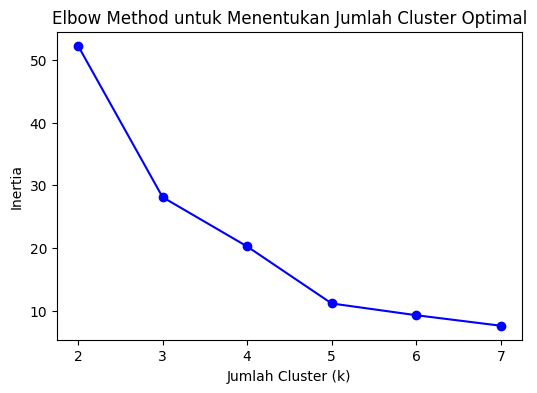

In [80]:
# Normalisasi Fitur
features = ['sales_amount', 'profit_margin', 'sales_qty', 'avg_profit_per_sale']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_customer[features])

# Menentukan Jumlah Cluster Optimal
inertia = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [81]:
# Clustering Pelanggan
kmeans = KMeans(n_clusters=3, random_state=42)
df_customer['cluster'] = kmeans.fit_predict(X_scaled)


In [90]:
# Tambahkan koordinat
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_customer['PCA1'] = pca_result[:, 0]
df_customer['PCA2'] = pca_result[:, 1]
df_customer.head()

,custmer_name,sales_amount,profit_margin,sales_qty,avg_profit_per_sale,cluster,PCA1,PCA2
0,Acclaimed Stores,21196727,321095.18,26705,12.023785,0,-0.358588,0.032006
1,All-Out,6068432,154729.65,11024,14.035708,0,-0.632224,0.235232
2,Atlas Stores,16666713,295896.22,25732,11.499154,0,-0.415577,-0.018644
3,Control,31771997,825928.10,48767,16.936209,2,0.060516,0.505124
4,Electricalsara Stores,413333588,9307899.35,653823,14.236115,1,9.847866,-0.033263


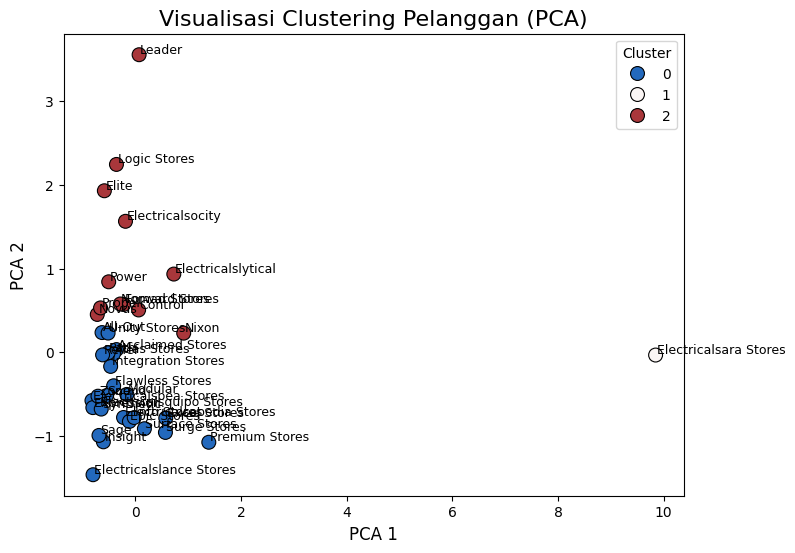

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
x = df_customer['PCA1']
y = df_customer['PCA2']
clusters = df_customer['cluster']
names = df_customer['custmer_name']  # pastikan kolomnya benar

# Plot dasar dengan seaborn untuk pewarnaan ---
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df_customer,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='vlag',
    s=100,
    edgecolor="black"
)

# Tambahkan nama di setiap titik ---
for i in range(len(df_customer)):
    plt.text(
        x[i] + 0.02, y[i] + 0.02,  # posisi teks sedikit digeser
        names[i],
        fontsize=9,
        color='black'
    )

plt.title('Visualisasi Clustering Pelanggan (PCA)', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [58]:
# === 9. Simpan Hasil ===
df_customer.to_csv('customer_segmentation_result.csv', index=False)
print("\nHasil disimpan ke: customer_segmentation_result.csv")


Hasil disimpan ke: customer_segmentation_result.csv
